# VIsualizaciones

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Para modificar el tamaño de todos los gráficos
rcParams['figure.figsize'] = 15,9
# Para que no nos molesten los mensajes de advertencia.
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

## Estadísticas descriptivas por equipo

Primero, veremos las estadísticas que engloban datos generales

### Victorias anuales

Importemos las bases de datos necesarias

In [3]:
period = 11
df_team_victory = [None]*11
df_team_victory_copy = [None]*11
csv = '.csv'
team_victory_path = 'Data/Teams/team_victories_'

Crearemos una columna que contenga el promedio de vitorias por temporada

In [4]:
for i in range(0,period):
    df_team_victory[i] = pd.read_csv(team_victory_path + str(2011 + i) + csv)
    
    df_team_victory_copy[i] = df_team_victory[i].copy()
    
    df_team_victory_copy[i]['Promedio_victorias'] = df_team_victory_copy[i]['Victorias']/df_team_victory_copy[i]['Juegos totales']
    df_team_victory_copy[i] = df_team_victory_copy[i].sort_values('Promedio_victorias', ascending = False)

Veamos el resultado final

In [5]:
df_team_victory_copy[0]

,Acronimo,Equipo,Victorias,Juegos totales,Promedio_victorias
19,PHI,Philadelphia Phillies,102,162,0.629630
17,NYY,New York Yankees,97,162,0.598765
...,...,...,...,...,...
15,MIN,Minnesota Twins,63,162,0.388889
9,HOU,Houston Astros,56,162,0.345679


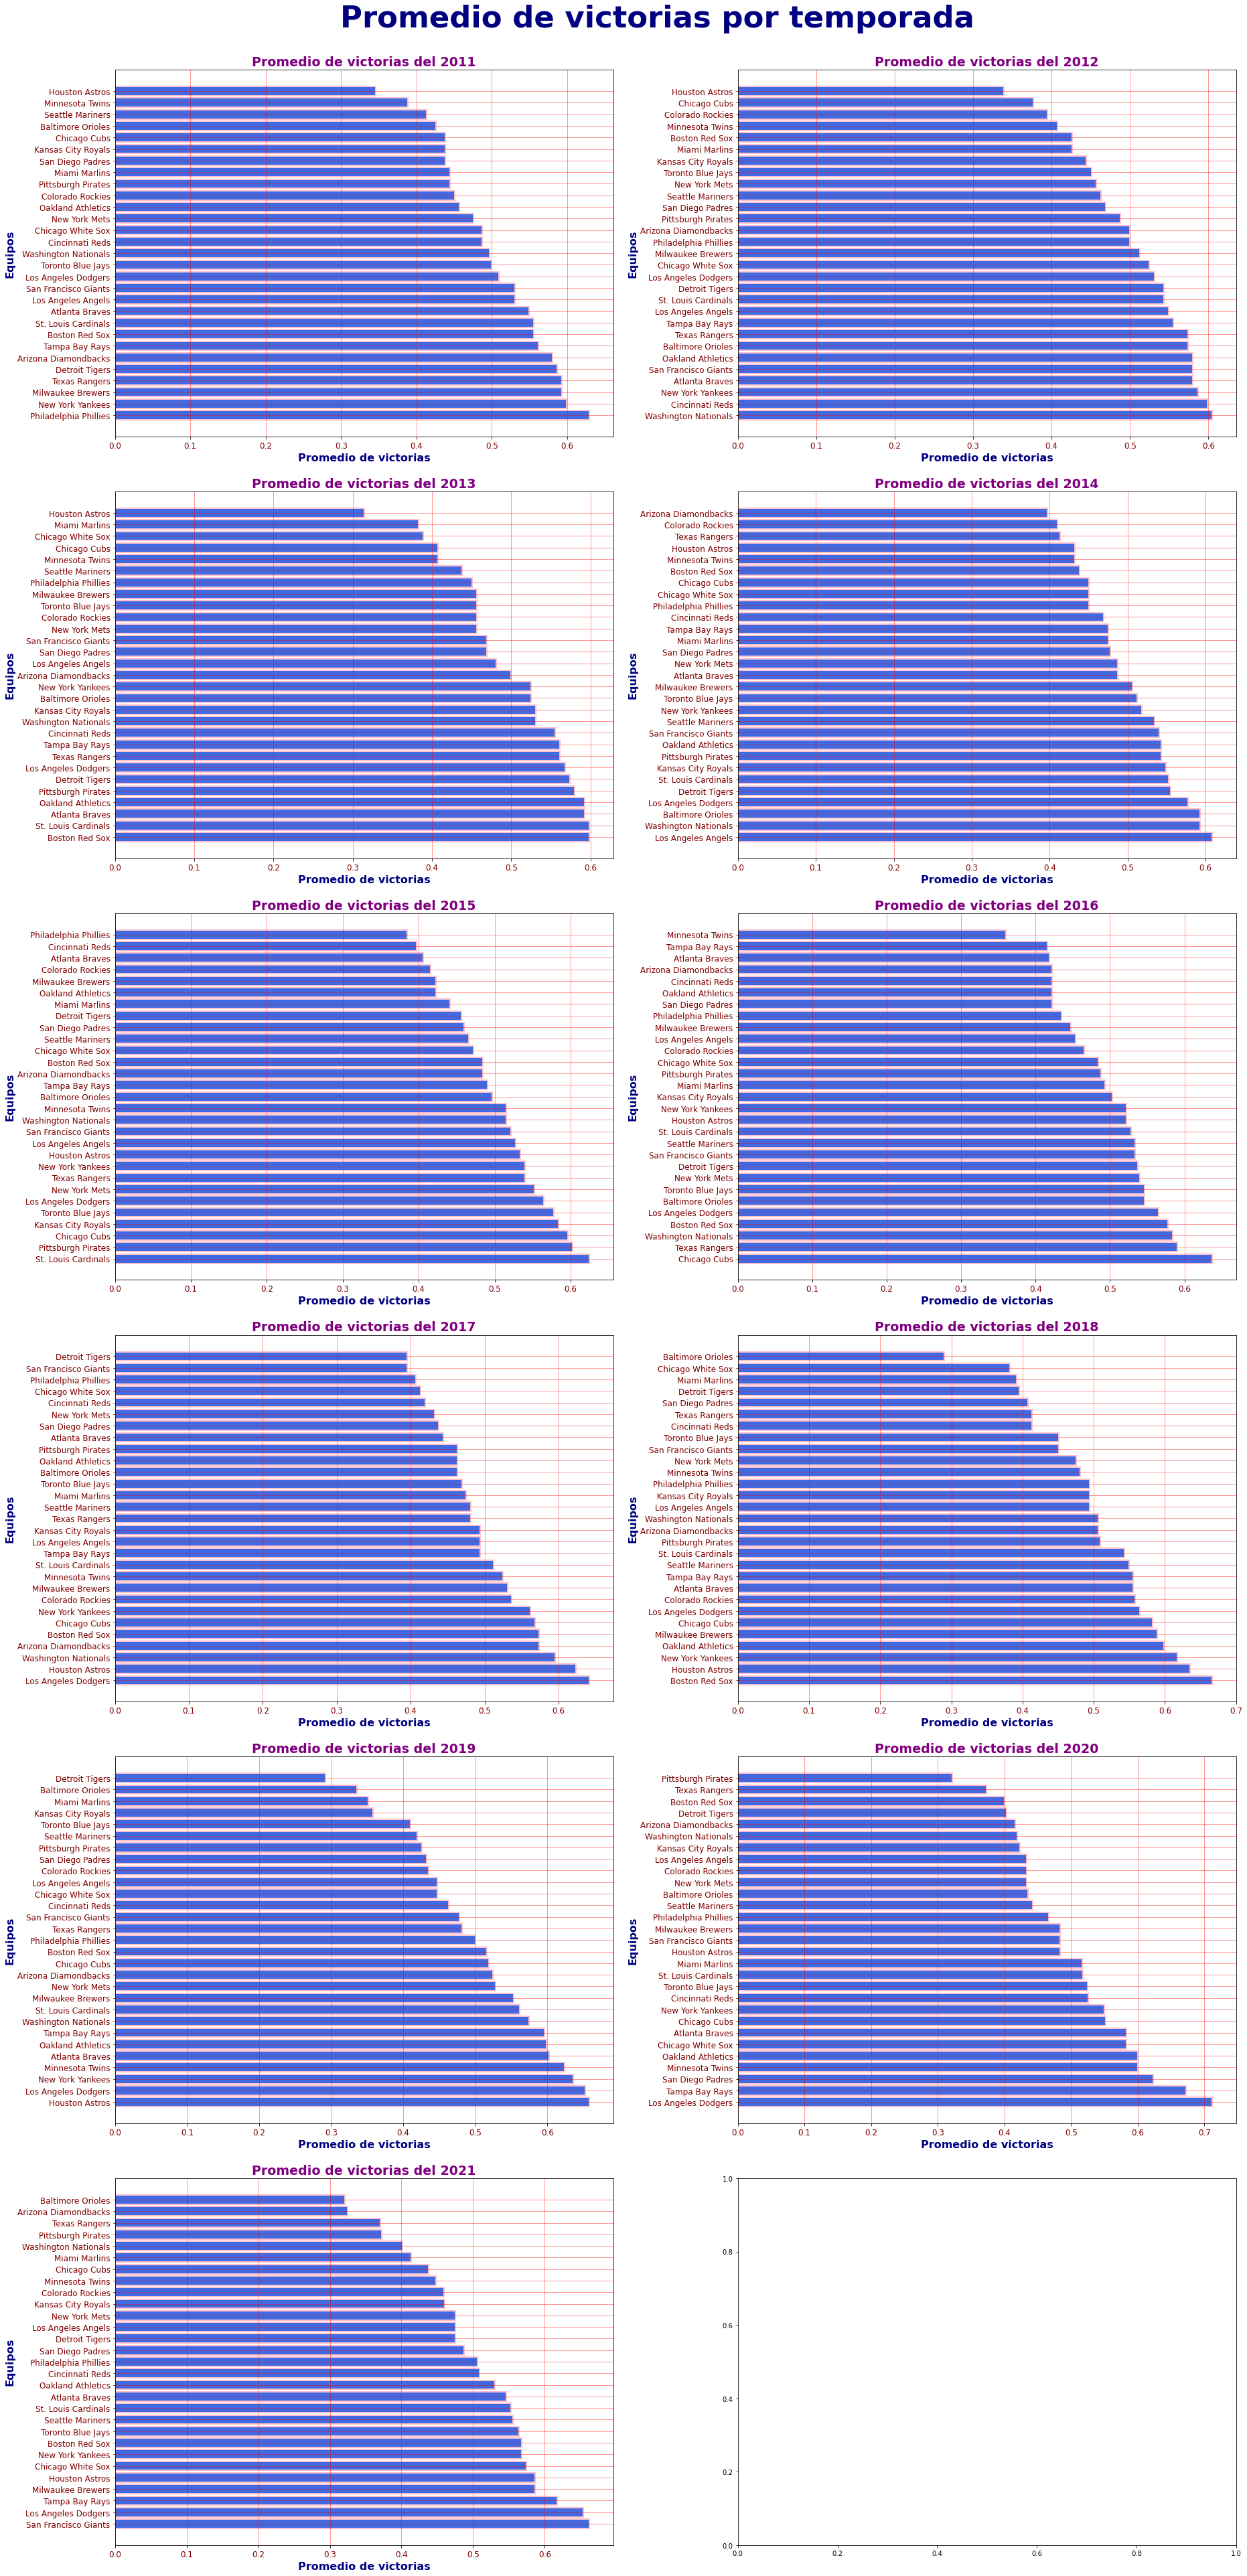

In [6]:
# La lógica de esta gráfica es análoga a anteriores con grid o subplots
fig, axes = plt.subplots(6, 2, figsize=(30,68), 
                         sharey = False, sharex = False)
fig.suptitle("Promedio de victorias por temporada", 
             fontsize = 45, color = 'navy', 
             fontweight = 'bold', y = 0.90)

k = 0
for i in range(int(period/2)):    
    # Años impares
    axes[i,0].barh(df_team_victory_copy[k]['Equipo'], df_team_victory_copy[k]['Promedio_victorias'], 
             align='center', color = 'royalblue',
             edgecolor = 'pink', linewidth = 2 )
    axes[i,0].set_title('Promedio de victorias del ' + str(2011 + k), 
                        fontsize = 19, fontweight = 'bold', 
                        color = 'purple')
    axes[i,0].set_xlabel('Promedio de victorias',
                         fontsize = 16, color = 'navy',
                         fontweight = 'bold')
    axes[i,0].set_ylabel('Equipos', 
                         fontsize = 16, color = 'navy',
                         fontweight = 'bold')
    axes[i,0].tick_params(labelsize = 12,
                          labelcolor = 'maroon')
    axes[i,0].grid(color = 'red', 
                   linestyle = '-', alpha = 0.5)
    # Año 2021
    if i == int(period/2 - 1):
        axes[i+1,0].barh(df_team_victory_copy[k+2]['Equipo'], df_team_victory_copy[k+2]['Promedio_victorias'], 
             align='center', color = 'royalblue',
             edgecolor = 'pink', linewidth = 2 )
        axes[i+1,0].set_title('Promedio de victorias del ' + str(2011 + k + 2), 
                              fontsize = 19, fontweight = 'bold', 
                              color = 'purple')
        axes[i+1,0].set_xlabel('Promedio de victorias',
                               fontsize = 16, color = 'navy',
                               fontweight = 'bold')
        axes[i+1,0].set_ylabel('Equipos', 
                               fontsize = 16, color = 'navy',
                               fontweight = 'bold')
        axes[i+1,0].tick_params(labelsize = 12,
                                labelcolor = 'maroon')
        axes[i+1,0].grid(color = 'red', 
                         linestyle = '-', alpha = 0.5)
    
    # Años pares
    axes[i,1].barh(df_team_victory_copy[k+1]['Equipo'], df_team_victory_copy[k+1]['Promedio_victorias'], 
             align='center', color = 'royalblue',
             edgecolor = 'pink', linewidth = 2 )
    axes[i,1].set_title('Promedio de victorias del ' + str(2011 + k + 1), 
                        fontsize = 19, fontweight = 'bold', 
                        color = 'purple')
    axes[i,1].set_xlabel('Promedio de victorias',
                         fontsize = 16, color = 'navy',
                         fontweight = 'bold')
    axes[i,1].set_ylabel('Equipos', 
                         fontsize = 16, color = 'navy',
                         fontweight = 'bold')
    axes[i,1].tick_params(labelsize = 12,
                          labelcolor = 'maroon')
    axes[i,1].grid(color = 'red', 
                   linestyle = '-', alpha = 0.5)
    
    k = k + 2

plt.subplots_adjust(wspace = 0.25, hspace = 0.15)

### Comparación entre jugadores normales y agentes libres